# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&units=metric&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dzhetygara
Processing Record 2 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 3 of Set 1 | kristiansund
Processing Record 4 of Set 1 | assinovskaya
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | vadso
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | krasne
Processing Record 9 of Set 1 | papatowai
Processing Record 10 of Set 1 | steamboat springs
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | fale old settlement
Processing Record 13 of Set 1 | keflavik
Processing Record 14 of Set 1 | saint-pierre
Processing Record 15 of Set 1 | college
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | kirakira
Processing Record 18 of Set 1 | guaratuba
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | atlantic beach
Processing Record 21 o

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dzhetygara,52.1908,61.2006,-14.49,96,84,3.55,KZ,1706653403
1,kristiansund,63.1115,7.7320,2.36,44,67,1.54,NO,1706653403
2,assinovskaya,43.2400,45.1800,-2.76,93,16,1.48,RU,1706653404
3,edinburgh of the seven seas,-37.0676,-12.3116,14.37,60,63,4.20,SH,1706653404
4,vadso,70.0744,29.7487,4.09,70,0,11.32,NO,1706653404


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dzhetygara,52.1908,61.2006,-14.49,96,84,3.55,KZ,1706653403
1,kristiansund,63.1115,7.7320,2.36,44,67,1.54,NO,1706653403
2,assinovskaya,43.2400,45.1800,-2.76,93,16,1.48,RU,1706653404
3,edinburgh of the seven seas,-37.0676,-12.3116,14.37,60,63,4.20,SH,1706653404
4,vadso,70.0744,29.7487,4.09,70,0,11.32,NO,1706653404


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

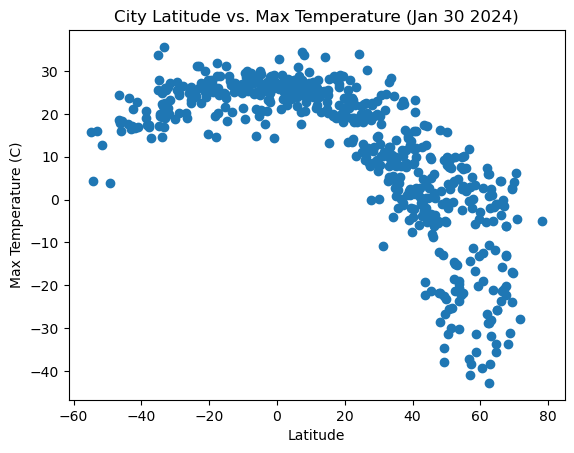

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (Jan 30 2024)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

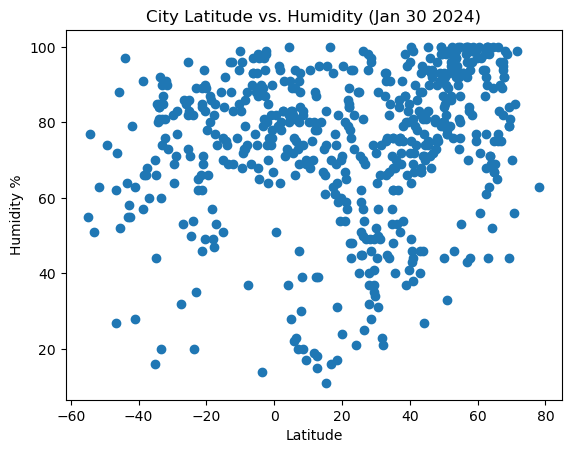

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs. Humidity (Jan 30 2024)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

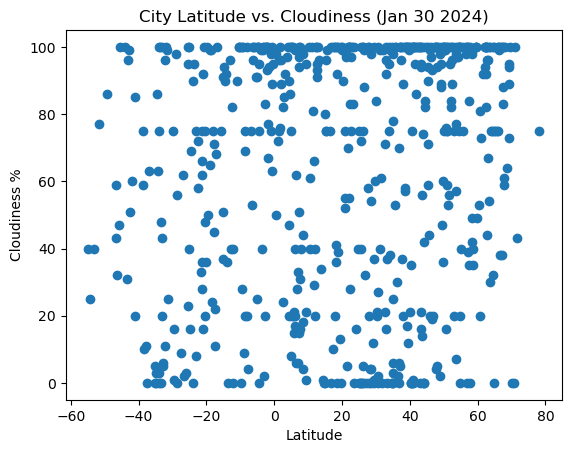

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitude vs. Cloudiness (Jan 30 2024)")


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

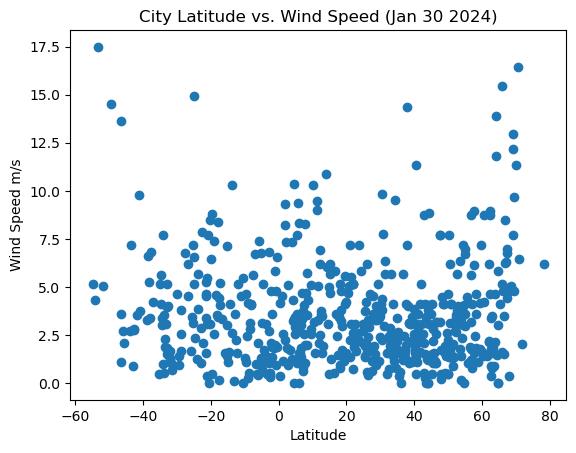

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed m/s")
plt.title("City Latitude vs. Wind Speed (Jan 30 2024)")


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plotLinReg(x, y, title = "Linear Regression", xlabel = "predictor" , ylabel = "output", xyloc= (1,1)):
    
    #run regression on given data
    [slope, intercept, r_value, p_value, std_err] = linregress(x, y)
    regline = slope*x + intercept

    #create the scatter plot of data
    plt.scatter(x = x, y = y, color = "green")

    #create the line plot of the regression analysis and include forumala on graph
    plt.plot(x, regline, color = "red")
    plt.annotate(text = f"y = {round(slope,3)}x + {round(intercept,3)}", color = "red", xy = xyloc)

    #create labels and titles for graph
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    #print the r value
    print(f"The r value is {r_value}")

    #show graph
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dzhetygara,52.1908,61.2006,-14.49,96,84,3.55,KZ,1706653403
1,kristiansund,63.1115,7.7320,2.36,44,67,1.54,NO,1706653403
2,assinovskaya,43.2400,45.1800,-2.76,93,16,1.48,RU,1706653404
4,vadso,70.0744,29.7487,4.09,70,0,11.32,NO,1706653404
6,krasne,49.9145,24.6134,-0.47,80,60,2.26,UA,1706653404


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,edinburgh of the seven seas,-37.0676,-12.3116,14.37,60,63,4.20,SH,1706653404
5,port-aux-francais,-49.3500,70.2167,3.79,74,86,14.52,TF,1706653404
7,papatowai,-46.5619,169.4708,18.48,62,43,1.08,NZ,1706653405
9,waitangi,-43.9535,-176.5597,17.68,97,100,2.68,NZ,1706653405
10,fale old settlement,-9.3852,-171.2468,29.50,68,28,2.45,TK,1706653405


###  Temperature vs. Latitude Linear Regression Plot

The r value is -0.8003659417132506


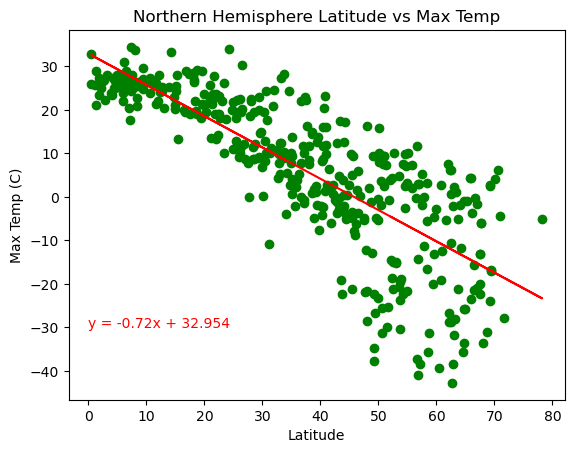

In [24]:
# Linear regression on Northern Hemisphere
plotLinReg(x = northern_hemi_df["Lat"], y = northern_hemi_df["Max Temp"], title = "Northern Hemisphere Latitude vs Max Temp", xlabel = "Latitude", ylabel = "Max Temp (C)", xyloc= (0, -30))

The r value is 0.5027493551334978


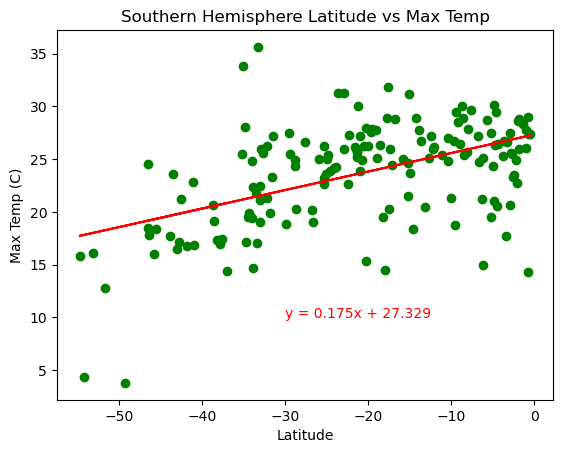

In [25]:
# Linear regression on Southern Hemisphere
plotLinReg(x = southern_hemi_df["Lat"], y = southern_hemi_df["Max Temp"], title = "Southern Hemisphere Latitude vs Max Temp", xlabel = "Latitude", ylabel = "Max Temp (C)", xyloc= (-30, 10))

**Discussion about the linear relationship:** 
The relationship between Latitude and Max Temperature in the Northern Hemisphere has a strong negative correlation. Whereas the same relationship in the Southern Hemisphere has a positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r value is 0.30340932847078683


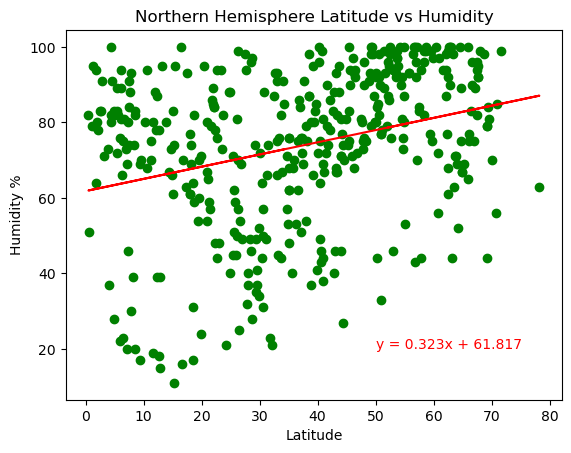

In [17]:
# Northern Hemisphere
plotLinReg(x = northern_hemi_df["Lat"], y = northern_hemi_df["Humidity"], title = "Northern Hemisphere Latitude vs Humidity", xlabel = "Latitude", ylabel = "Humidity %", xyloc= (50, 20))

The r value is 0.31196255400144185


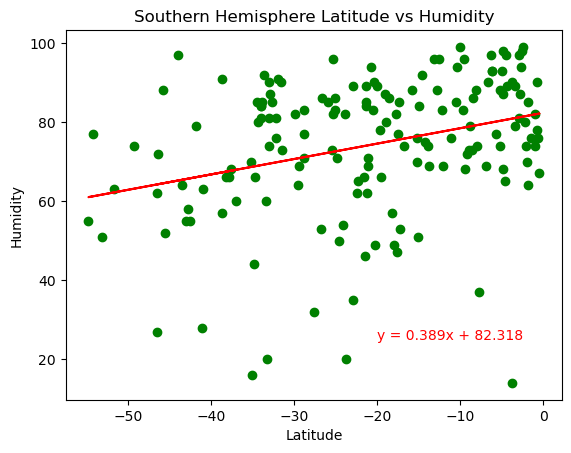

In [26]:
# Southern Hemisphere
plotLinReg(x = southern_hemi_df["Lat"], y = southern_hemi_df["Humidity"], title = "Southern Hemisphere Latitude vs Humidity", xlabel = "Latitude", ylabel = "Humidity", xyloc= (-20, 25))

**Discussion about the linear relationship:** 
The Humidity in the Southern and Northern Hemispheres both have small positive correlation's with Latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is 0.1517682016868664


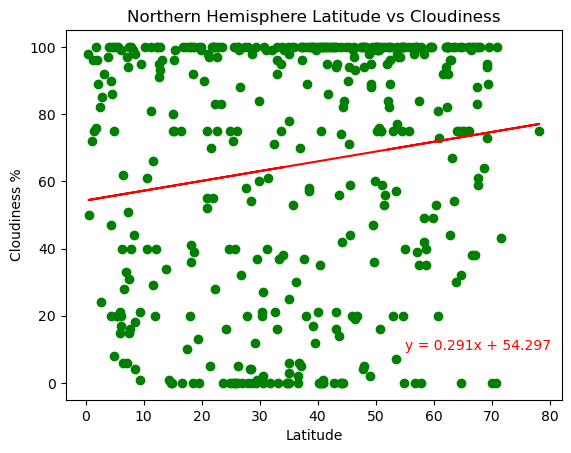

In [28]:
# Northern Hemisphere
plotLinReg(x = northern_hemi_df["Lat"], y = northern_hemi_df["Cloudiness"], title = "Northern Hemisphere Latitude vs Cloudiness", xlabel = "Latitude", ylabel = "Cloudiness %", xyloc= (55, 10))

The r value is 0.2781353909394139


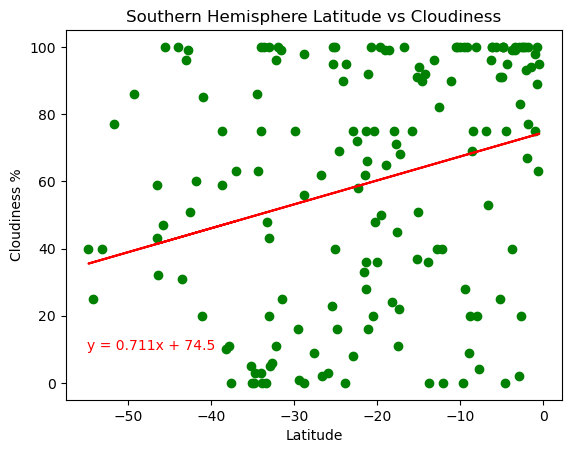

In [32]:
# Southern Hemisphere
plotLinReg(x = southern_hemi_df["Lat"], y = southern_hemi_df["Cloudiness"], title = "Southern Hemisphere Latitude vs Cloudiness", xlabel = "Latitude", ylabel = "Cloudiness %", xyloc= (-55, 10))

**Discussion about the linear relationship:** The Northern Hemisphere has a very weak positve to no correlation between Latitude and Cloudiness. The Southern Hemisphere has a weak positve correlation between Latitude and Cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is 0.08397351826112892


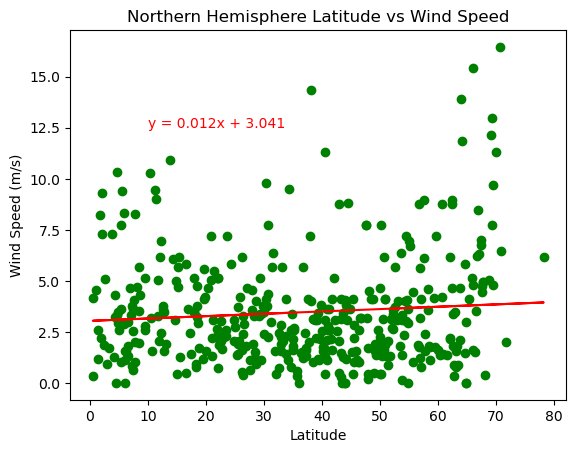

In [33]:
# Northern Hemisphere
plotLinReg(x = northern_hemi_df["Lat"], y = northern_hemi_df["Wind Speed"], title = "Northern Hemisphere Latitude vs Wind Speed", xlabel = "Latitude", ylabel = "Wind Speed (m/s)", xyloc= (10, 12.5))

The r value is -0.2745064575922212


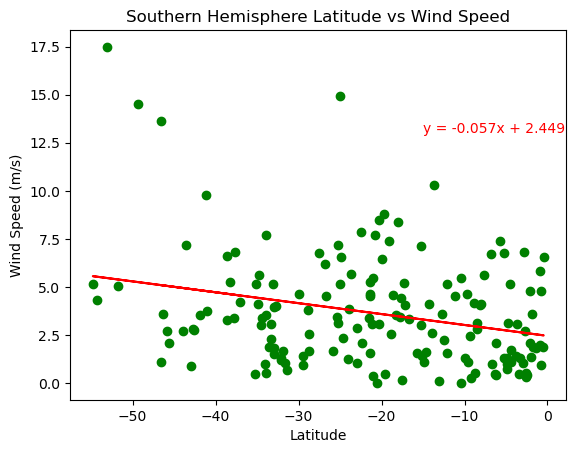

In [22]:
# Southern Hemisphere
plotLinReg(x = southern_hemi_df["Lat"], y = southern_hemi_df["Wind Speed"], title = "Southern Hemisphere Latitude vs Wind Speed", xlabel = "Latitude", ylabel = "Wind Speed (m/s)", xyloc= (-15, 13))

**Discussion about the linear relationship:** The Northern Hemisphere has very weak to no correltion between latitude and Wind Speed. Whereas the Southern Hemisphere has a samll negative correlation between Latitude and Wind Speed.